In [1]:
# Installing necessary libraries
!pip install matplotlib
!pip install opencv-python

Image size: (883, 878)
Template size: (156, 447)


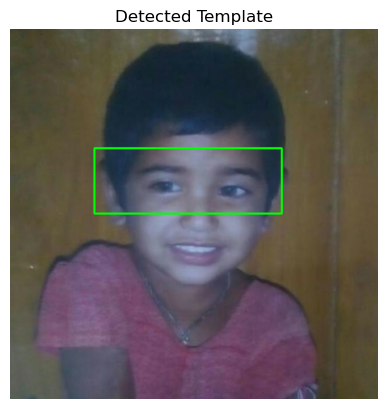

In [3]:
# importing necessary modules
import cv2
import matplotlib.pyplot as plt

# Reading  the main image through imread function
img = cv2.imread("C:\\Users\\Shiva Goud\\Pictures\\Screenshots\\chikki.png")

# Convert the main image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Read the template image  in grayscale
template = cv2.imread("C:\\Users\\Shiva Goud\\Desktop\\chikki template.png", 0)

# Print image and template sizes to debug
print("Image size:", img_gray.shape) # shape function tell about the diemnsion
print("Template size:", template.shape) # shape function tell about the diemnsion

# Checking  if template  shape is smaller than the main image shape 
if img_gray.shape[0] >= template.shape[0] and img_gray.shape[1] >= template.shape[1]:
    # Match the template using normalized cross-correlation
    result = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

    # Get the min/max values and their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Get the top-left corner of the matching region
    top_left = max_loc

    # Get the width and height of the template
    h, w = template.shape[:2]

    # Define the bottom-right corner based on the size of the template
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw a rectangle around the detected template match
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.title('Detected Template')
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Error: Template size is larger than the image!")
